In [ ]:
def calculate_whiskers(vmin, q1, q3, vmax):
    # Calculate the interquartile range
    iqr = q3 - q1
    
    # Calculate the lower and upper whiskers
    lower_whisker = max(vmin, q1 - 1.5 * iqr)
    upper_whisker = min(vmax, q3 + 1.5 * iqr)
    
    return lower_whisker, upper_whisker

# Example usage:
lower_whisker, upper_whisker = calculate_whiskers(-1, -.7, -.31, .95)
print(f"Lower Whisker: {lower_whisker}, Upper Whisker: {upper_whisker}")

In [3]:
out_dir = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/Figures/3_cohort_delta_r/split_by_age_grou/box_and_whisker'

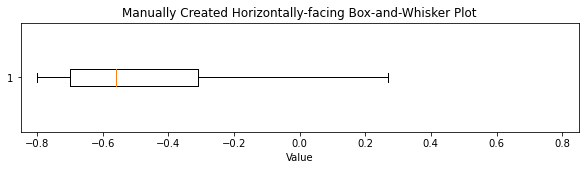

In [39]:
import matplotlib.pyplot as plt

def create_manual_boxplot(lower_whisker, q1, median, q3, upper_whisker, outliers, xlim, out_dir, file_name='boxplot.svg'):
    """
    Creates a horizontally-facing box-and-whisker plot with manually provided values.

    Parameters:
    - lower_whisker: Lower whisker value.
    - q1: Lower quartile (25th percentile).
    - median: Median value (50th percentile).
    - q3: Upper quartile (75th percentile).
    - upper_whisker: Upper whisker value.
    - outliers: List of outliers beyond the whiskers.
    - xlim: Tuple specifying the x-axis limits (min, max).
    - out_dir: Directory to save the plot.
    - file_name: Name of the file to save the plot as, default is 'boxplot.svg'.
    """
    
    # Prepare the boxplot data structure
    boxplot_data = {
        'whislo': lower_whisker,   # Lower whisker
        'q1': q1,                  # Lower quartile
        'med': median,             # Median
        'q3': q3,                  # Upper quartile
        'whishi': upper_whisker,   # Upper whisker
        'fliers': outliers         # Outliers
    }
    
    # Create the figure and the axes
    fig, ax = plt.subplots(figsize=(10, 2))
    
    # Plotting the boxplot using the provided data
    ax.bxp([boxplot_data], vert=False, showfliers=True)
    
    # Set the x-axis limits
    ax.set_xlim(xlim)
    
    # Set the title and labels
    ax.set_title('Manually Created Horizontally-facing Box-and-Whisker Plot')
    ax.set_xlabel('Value')
    
    # Save the plot as an SVG file
    plt.savefig(f'{out_dir}/{file_name}', format='svg')
    plt.show()
    plt.close()

# Example usage
lower_whisker = -.8
q1 = -.7
median = -.56
q3 = -.31
upper_whisker = .27
outliers = []
xlim = (-0.85, 0.85)

create_manual_boxplot(lower_whisker, q1, median, q3, upper_whisker, outliers, xlim, out_dir, file_name='pd_old_boxplot.svg')


In [20]:
# Example usage
negative_outliers = [-.08, -0.07]
lower_iqr = 0.22
median = 0.32
upper_iqr = 0.41
positive_outliers = [0.73]
xlim = (-0.7, 0.7)


In [21]:
create_manual_boxplot(negative_outliers, lower_iqr, median, upper_iqr, positive_outliers, xlim, out_dir, file_name='manual_boxplot.svg')


TypeError: create_manual_boxplot() missing 1 required positional argument: 'out_dir'